# Básico sobre os modelos

In [5]:
!python --version

Python 3.7.7


In [6]:
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print( ' scipy: {} ' .format(scipy.__version__))
print( ' numpy: {} ' .format(numpy.__version__))
print( ' matplotlib: {} ' .format(matplotlib.__version__))
print( ' pandas: {} ' .format(pandas.__version__))
print( ' sklearn: {} ' .format(sklearn.__version__))

 scipy: 1.1.0 
 numpy: 1.15.4 
 matplotlib: 3.1.3 
 pandas: 1.0.3 
 sklearn: 0.20.1 


## Distribuição Gaussiana

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import seed
from numpy.random import randn
import matplotlib.colors

%matplotlib inline

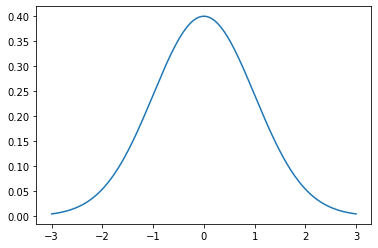

In [6]:
# Gerar um gráfico com uma Gaussiana Ideal
x_axis = np.arange(-3, 3, 0.001)
y_axis = norm.pdf(x_axis, 0, 1)
plt.plot(x_axis, y_axis)
plt.show()

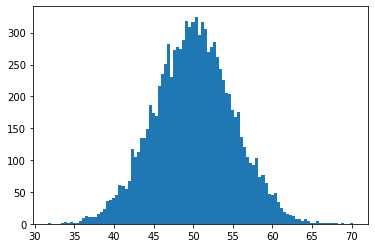

In [7]:
# Gerar uma Gaussina a partir de uma amostra randômica
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# histograma dos dados
plt.hist(data, bins=100)
plt.show()

In [8]:
# Calcular as medidas padrões
result = np.mean(data)
print( ' Média: %.3f ' % result)
result = np.median(data)
print( ' Mediana: %.3f ' % result)

 Média: 50.049 
 Mediana: 50.042 


Podemos usar o sistema HSV para obter cores diferentemente saturadas e iluminadas para o mesmo tom. Suponha que você tenha no máximo 10 categorias, então o mapa tab10 pode ser usado para obter um certo número de cores base. Entre esses, podemos escolher alguns tons mais claros para as subcategorias.

A seguir seria uma função categorical_cmap, que recebe como entrada o número de categorias (nc) e o número de subcategorias (nsc) e retorna um mapa de cores com nc * nsc cores diferentes, onde para cada categoria há cores nsc da mesma tonalidade.

In [9]:
def categorical_cmap(nc, nsc, cmap="tab10", continuous=False):
    if nc > plt.get_cmap(cmap).N:
        raise ValueError("Too many categories for colormap.")
    if continuous:
        ccolors = plt.get_cmap(cmap)(np.linspace(0,1,nc))
    else:
        ccolors = plt.get_cmap(cmap)(np.arange(nc, dtype=int))
    cols = np.zeros((nc*nsc, 3))
    for i, c in enumerate(ccolors):
        chsv = matplotlib.colors.rgb_to_hsv(c[:3])
        arhsv = np.tile(chsv,nsc).reshape(nsc,3)
        arhsv[:,1] = np.linspace(chsv[1],0.25,nsc)
        arhsv[:,2] = np.linspace(chsv[2],1,nsc)
        rgb = matplotlib.colors.hsv_to_rgb(arhsv)
        cols[i*nsc:(i+1)*nsc,:] = rgb       
    cmap = matplotlib.colors.ListedColormap(cols)
    return cmap

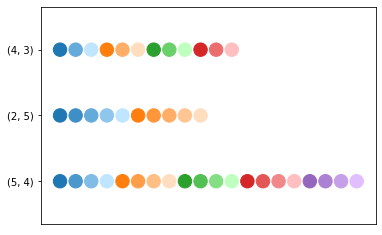

In [10]:
c1 = categorical_cmap(4, 3, cmap="tab10")
plt.scatter(np.arange(4*3),np.ones(4*3)+1, c=np.arange(4*3), s=180, cmap=c1)

c2 = categorical_cmap(2, 5, cmap="tab10")
plt.scatter(np.arange(10),np.ones(10), c=np.arange(10), s=180, cmap=c2)

c3 = categorical_cmap(5, 4, cmap="tab10")
plt.scatter(np.arange(20),np.ones(20)-1, c=np.arange(20), s=180, cmap=c3)    

plt.margins(y=0.3)
plt.xticks([])
plt.yticks([0,1,2],["(5, 4)", "(2, 5)", "(4, 3)"])
plt.show()